<a href="https://colab.research.google.com/github/tanay47/Airbnb-Data-Analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

### THIS IS A REALLY SIMPLE EDA ON AIRBNB DATASET WHICH WILL ANSWER BASIC QUERY USING VARIABLES OF THIS DATASET.

In [1]:
### FIRST THINGS, FIRST. WHICH WILL GET OUR BOAT GOING.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### MOUNTING NOTEBOOK TO DRIVE.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### READING OUR DATASET. ALSO CHECKING USING head() FUNCTION.

airbnb_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 1/CS PROJECT 1 (EDA)/Copy of Airbnb NYC 2019.csv")
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
### EXTRACTING INFO FROM DATAFRAME USING info() finction.

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
### GLANCING AT ALL COLUMNS OF DATASET, CHECKING FOR UNWANTED CATEGORIES/COLUMNS.

airbnb_df_columns = airbnb_df.columns
airbnb_df_columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
### DROPPING UNWANED COLUMNS 'latitude', 'longitude' TO HAVE A PRECISE DATASET.

airbnb_df = airbnb_df.drop(['id','last_review'], axis=1)

In [7]:
### TO HAVE A SENSIBLE DATA TO WORK WITH, WE WILL CHECK AND ELIMINATE DUPLICATE OBSERVATIONS/RECORDS.

dupli_rows_df = airbnb_df[airbnb_df.duplicated()]
print(f"No of duplicate record is", {dupli_rows_df.shape}) 

No of duplicate record is {(0, 14)}


GREAT, WE HAVE NO DUPLICATE RECORDS OR OBSERVATIONS. SO, MOVING AHED. 

### WE'LL ALSO HAVE TO TAKE CARE OF MISSING DATA, NULL VALUES.


In [8]:
### CHECK FOR MISSING DATA, NULL VALUES. ALSO REPLACING THEM WITH APPROPRIATE DATA.

airbnb_df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

ANALYSING FROM ABOVE DATA, WE CAN ELEMINATE NULL OBSERVATIONS FROM COLUMNS ["names", "host_name"],  AS ELEMINATING THEM WILL NOT CAUSE ANY DISTURBING CHANGE IN DATA.

In [9]:
### ELEMINATING ALL NULL VALUES FROM COLUMNS  "name" AND "host_name".

airbnb_df.dropna(subset = ["name","host_name"], inplace=True)

In [10]:
### SUBSTITUTING "0" IN ALL "NAN" VALUES IN COLUMN "reviews_per_month".

airbnb_df.fillna(0,inplace=True)


### CONFIRMING IF ALL THE "NAN" VALUES ARE REPLACED.
airbnb_df.isna().sum()


name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

GREAT, AT THIS POINT WE HAVE TAKEN CARE OF ALL "NAN" VALUES.

LASTLY WE SHOULD ALSO CHECK FOR OUTLIERS FOR RELEVENT COLUMNS.

In [11]:
airbnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


ANALYSIING THE ABOVE TABLE SHOWS, MOST OF THE COLUMNS ARE WELL WITHIN ACCEPTABLE RANGE EXCEPT FOR "minimum_nights" COLUMN.

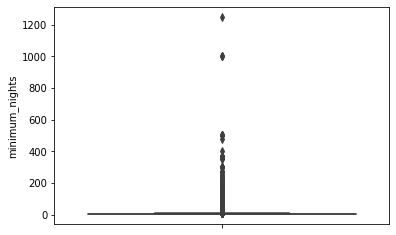

In [12]:
### PLOTTING OUTLIERS OF COLUMN "minimum_nights".

sns.boxplot(y=airbnb_df["minimum_nights"])

### ALRIGHT, WE ARE DONE WITH CLEANING OUR DATA. NOW OUR DATASET IS READY FOR ANALYSIS WITH BETTER ACCURACY THAN BEFORE.


let's start with basic analysis with every column we possibly can.

### 1. let's find which neighbourhood are really popullar.

In [13]:
### GROUPING ON "neighbourhood" COLUMN AND COUNTING THE OCCURANCE IN DATASET.

neighbourhood_count_df = pd.DataFrame(airbnb_df.groupby("neighbourhood")["neighbourhood"].count().sort_values(ascending=False)[:10])
neighbourhood_count_df.rename(columns={"neighbourhood":"Count"}, inplace=True)
neighbourhood_count_df.reset_index(inplace=True)

print(f"Most demanding/popular neighbourhood are \n {neighbourhood_count_df}")

Most demanding/popular neighbourhood are 
         neighbourhood  Count
0        Williamsburg   3917
1  Bedford-Stuyvesant   3713
2              Harlem   2655
3            Bushwick   2462
4     Upper West Side   1969
5      Hell's Kitchen   1954
6        East Village   1852
7     Upper East Side   1797
8       Crown Heights   1563
9             Midtown   1545


So, we can see that "Williamsburg", "Bedford-stuyvesant", "Harlem" are most in demand neighbourhoods. 

Let's take a step ahed and plot it graphically on a bar graph.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


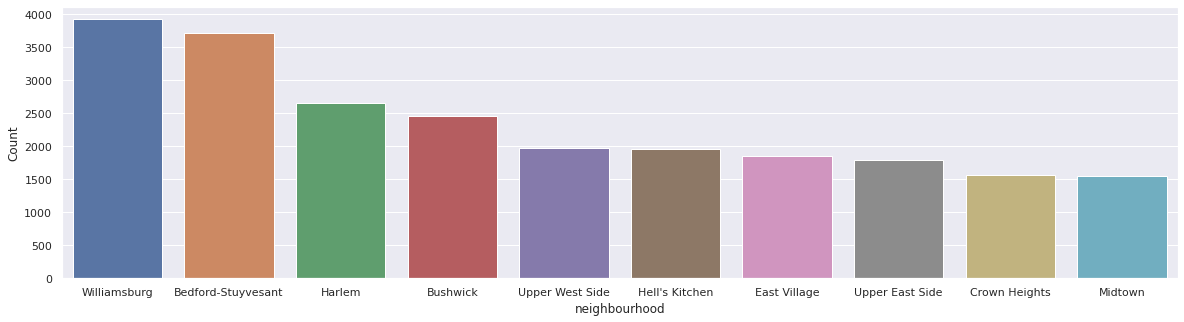

In [14]:
### PLOTTING THE ABOVE QUERY GRAPHICALLY USING "matplotlib".

sns.set(rc={'figure.figsize':(20,5)})
x,y = neighbourhood_count_df["neighbourhood"],neighbourhood_count_df["Count"]
sns.barplot(x,y)



### 2. LET'S CHECK AVERAGE PRICE FOR 10 MOST POPULLAR NEIGHBOURHOOD.

In [15]:
### CALCULATING AVERAGE PRICE OF TOP 10 NEIGHBOOURS.

# CREATING EMPTY LIST TO STORE VALUES IN.
top_neighbourhood_list = list(neighbourhood_count_df["neighbourhood"])
avg_neigh_list = []

# HERE WE WILL SUBSET OUR MAIN DATAFRAME(airbnb_df) TO CALCULATE MEAN FOR EACH NEIGHBOURHOOD.
for ele in top_neighbourhood_list:
  subset = airbnb_df[airbnb_df["neighbourhood"]== ele]
  mean = subset["price"].mean()
  avg_neigh_list.append(mean)

In [16]:
### NOW THAT WE HAVE A LIST, ADD IT TO TOP "neighbourhood_count_df".

neighbourhood_count_df["avg_price"] = avg_neigh_list
neighbourhood_count_df

,neighbourhood,Count,avg_price
0,Williamsburg,3917,143.826142
1,Bedford-Stuyvesant,3713,107.688392
2,Harlem,2655,118.952542
3,Bushwick,2462,84.815597
4,Upper West Side,1969,210.990350
5,Hell's Kitchen,1954,204.931934
6,East Village,1852,186.075594
7,Upper East Side,1797,188.872565
8,Crown Heights,1563,112.520154
9,Midtown,1545,282.719094


PLOTTING A BAR PLOT FOR VISUAL PREDENTATION.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


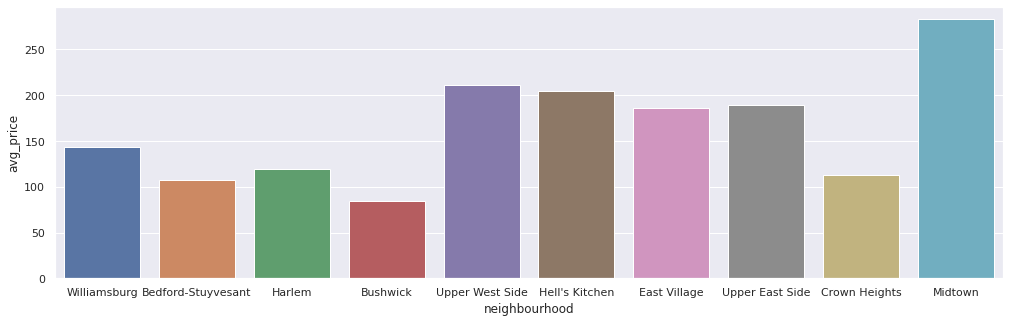

In [17]:
### SIMPLE BAR PLOT OF "nieghbourhood" VS "avg_price".

sns.set(rc={'figure.figsize':(17,5)})
x,y = neighbourhood_count_df["neighbourhood"],neighbourhood_count_df["avg_price"]
sns.barplot(x,y)

### 3.  let's find out, which room type was more prefered and which was least prefered.

In [18]:
### DIFFERENT TYPES OF "room_types"

airbnb_df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [19]:
### GROUPING AND COUNTING.

room_types_df = pd.DataFrame(airbnb_df.groupby("room_type")["room_type"].count())
room_types_df.rename(columns={"room_type":"Count"}, inplace=True)
room_types_df.reset_index(inplace=True)

room_types_df

,room_type,Count
0,Entire home/apt,25393
1,Private room,22306
2,Shared room,1159


ALRIGHT, WE CAN CLEARLY SEE APARTMENT WERE THE MOST IN DEMAND TYPE FOLLOWED BY "PRIVATE ROOM" AND "SHARED ROOM" RESPECTIVELY.

LET'S ALSO PLOT A PIE CHART TO CHECK THEIR PERCENTAGE DISTRIBUTION. 

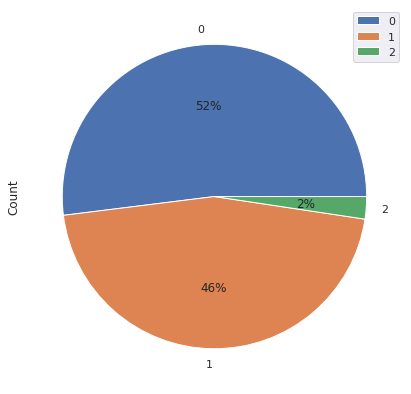

In [20]:
### PLOTTING PIE CHART USING MATPLOTLIB.

room_types_df.plot.pie(y='Count', figsize=(7, 7), autopct='%.0f%%')

NICE, PERCENTAGE DISTRIBUTION OF ALL ROOM TYPES ARE SHOWN ABOVE.

### 5. LET'S NOW CALCULATE AVETAGE PRICE FOR EACH ROOM TYPE.

In [21]:
### CALCULATING AVERAGE PRICE OF DIFFERENT ROOM TYPES.

# CREATING EMPTY LIST TO STORE VALUES IN.
room_type_list = list(room_types_df["room_type"])
avg_price_room_type_list = []

# HERE WE WILL SUBSET OUR MAIN DATAFRAME(airbnb_df) TO CALCULATE MEAN FOR EACH NEIGHBOURHOOD.
for ele in room_type_list:
  subset = airbnb_df[airbnb_df["room_type"]== ele]
  mean = subset["price"].mean()
  avg_price_room_type_list.append(mean)

In [22]:
### NOW THAT WE HAVE A LIST, ADD IT TO TOP "room_types_df".

room_types_df["avg_price"] = avg_price_room_type_list
room_types_df

,room_type,Count,avg_price
0,Entire home/apt,25393,211.806994
1,Private room,22306,89.794360
2,Shared room,1159,70.075928


LOOKING AT DATAFSET ABOVE, AVERAGE PRICE OF APERTMENT IS NOT ONLY HIGHEST BUT, IS GREATER THEN A JUGE MARGIN.

In [23]:
airbnb_df.head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


### 4. LET'S NOW ANALYSE RELATION BETWEEN "minimum_nights" AND "number_of_reviews". LETS CHECK WHICH ROOMS WITH MINIMUM NO OF NIGHTS WERE PREFERED AND REVIEWED.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


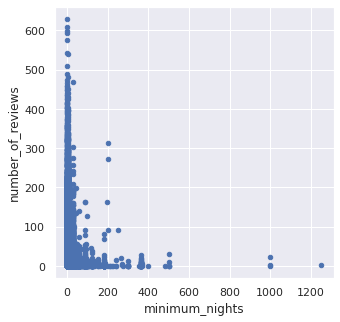

In [24]:
### USING SCATTER PLOT TO VISUALLY SEE THE RELATION.

room_price_df = pd.concat([airbnb_df["minimum_nights"], airbnb_df["number_of_reviews"]], axis=1)
room_price_df.plot.scatter(x="minimum_nights", y="number_of_reviews", figsize=(5,5))

LOOKING AT THE FIGURE ABOVE, WE CAN CONCLUDE CUSTOMERS MOSTLY STAYED AT ROOMS WHICH HAD MINIMUM STAY OF 1 NIGHT, ALSO REVIEWED THESE ROOMS A LOT MORE.

### 5. NOW LET'S FIND PRICE DISTRIBUTION FOR DIFFERENT REGIONS. 

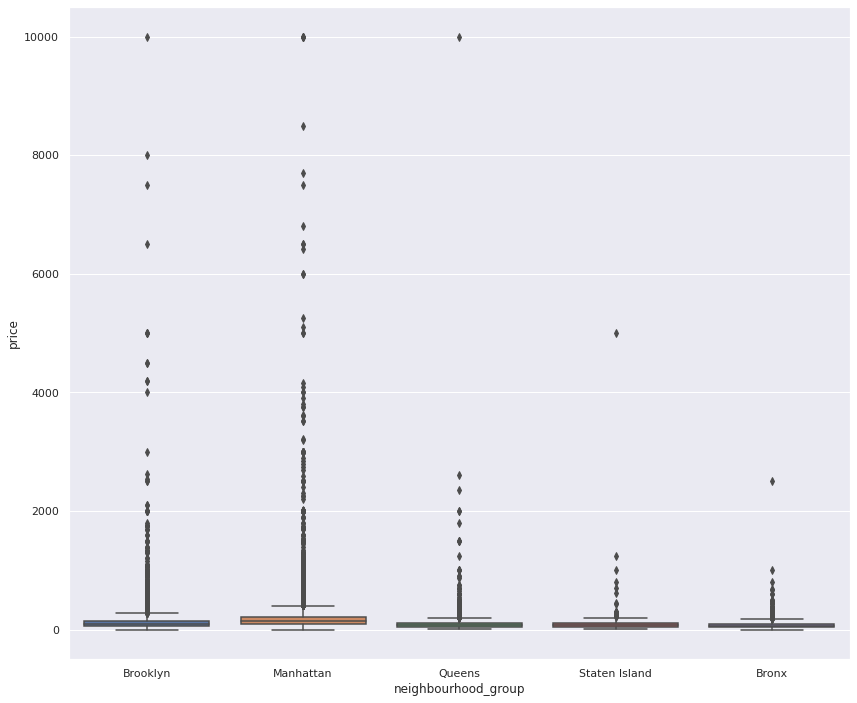

In [25]:
### USING A SIMPLE BOXPLOT ( "price" VS "neighbourhood_group")

plt.figure(figsize=(14,12))
sns.boxplot(y='price',x='neighbourhood_group',data = airbnb_df)

CONCLUDING FROM ABOVE DATASET, MANHATTAN IS MOST EXPENSIVE PRICE PER NIGHT AND, BRONX IS LEAST EXPENSIVE.

In [26]:
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### 6.  LETS FIND TOP 10 MOST RATED LISTINGS.

In [27]:
most_rated_listings = airbnb_df.copy().sort_values("number_of_reviews", ascending=False)[:10]
most_rated_listings

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


GREAT, THOSE ARE THE TOP REVIWED LISTINGS WHICH ARE MOSTLY FROM "MANHATTAN" AND "QUEENS".

### 7. LETS NOW FIND TOP HOST "id's" WITH MOST LISTINGS.

In [28]:
### COUNTING NO OF TIMES AN "id" OCCURS IN DATASET.

top_host_ids = pd.DataFrame(airbnb_df.groupby("host_id")["host_id"].count().sort_values(ascending=False)[:10])
top_host_ids.rename(columns={"host_id":"host_id_count"}, inplace=True)
#top_host_ids.reset_index(inplace=True)
top_host_ids

,host_id_count
host_id,
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96
12243051,96
61391963,91
22541573,87
200380610,65


WHY NOT CHECK PERCENTAGE DISTRIBUTION FOR ABOVE DATASET.

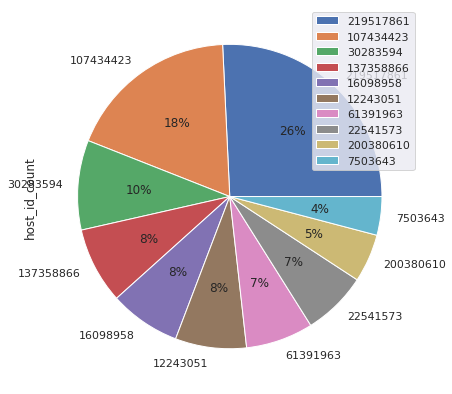

In [29]:
### PLOTTING PIE CHART USING MATPLOTLIB.

top_host_ids.plot.pie(y='host_id_count', figsize=(7, 7), autopct='%.0f%%')

SIMPLY LOOKING AT THIS CHART, IT'S EASY TO CONCLUDE :
-- ID NO "219517861" HAD MOST LISTINGS AND ALSO HAD 26%(MAJORITY) OF LISTINGS OF TOP 10 LISTINGS